In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import regionmask
import matplotlib.pyplot as plt

path_pr = r'daymet_v4_daily_na_pr_1980-2022.nc'
path_shp = r'cibolo\cibolo-merged.shp'

daymet_proj = "+proj=lcc +ellps=WGS84 +a=6378137 +b=6356752.314245 +lat_1=25 +lat_2=60 +lon_0=-100 +lat_0=42.5 +x_0=0 +y_0=0 +units=km +no_defs"
gdf = gpd.read_file(path_shp).to_crs(daymet_proj)

ds = xr.open_dataset(path_pr)
da = ds['prcp']

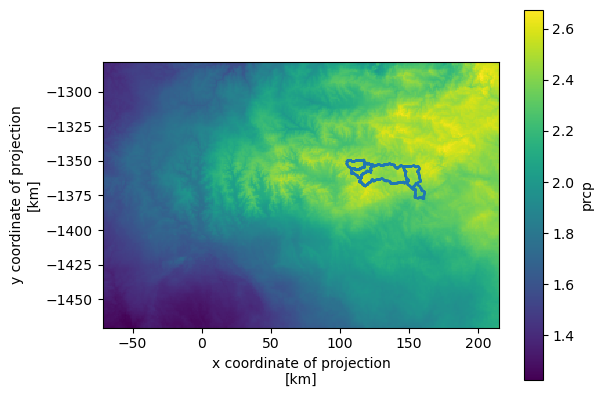

In [2]:
# plot to check that crs are the same
fig,ax = plt.subplots()
gdf.boundary.plot(ax=ax)
ds['prcp'].mean(dim='time').plot(ax=ax) # plot mean precipitation to show extent of gridded data

In [5]:
list_basins_dfs = []
gb = gdf.groupby('Id')
for Id, basin in gb:
    print(f'starting {Id}')
    mask_basin = regionmask.mask_3D_geopandas(
        basin, ds.x, ds.y
    )
    df1 = ds['prcp'].where(mask_basin).mean(dim=['x','y']).to_dataframe()
    df1.reset_index(inplace=True)
    df1.rename(columns={'time':'date','region':'Id'},inplace=True)
    df1['Id'] = Id
    df1['date'] = df1['date'].dt.date     
    df1['date'] = pd.to_datetime(df1['date'])
    df1.set_index('date', inplace=True)
    list_basins_dfs.append(df1)
print('done')
df0 = pd.concat(list_basins_dfs)

starting 1
starting 2
starting 3
starting 4
starting 5
done


In [6]:
df0.to_csv('cibolo_subbasin_prcp.csv')